In [1]:
from villas.dataprocessing.readtools import *
from villas.dataprocessing.timeseries import *
import numpy as np
import matplotlib.pyplot as plt
import re
import dpsimpy

#%matplotlib widget

In [2]:
%%bash
TOP=${TOP:-$(git rev-parse --show-toplevel)}
PATH=${TOP}/build/dpsim/examples/cxx

EMT_Slack_PiLine_VSI_VoltageControlled_LoadStep_with_PF_Init

[11:46:24.561623 PiLine warning] Zero value for Capacitance, setting default value of C=1e-12 [F]
[11:46:24.561652 PiLine warning] Zero value for Conductance, setting default value of G=1e-06 [S]
[11:46:24.580515 EMT_Slack_PiLine_VSI_VoltageControlled_LoadStep_with_PF_Init_PF info] Initialize simulation: EMT_Slack_PiLine_VSI_VoltageControlled_LoadStep_with_PF_Init_PF
[11:46:24.588079 EMT_Slack_PiLine_VSI_VoltageControlled_LoadStep_with_PF_Init_PF_PF_Solver warning] No suitable quantity found for setting mBaseApparentPower. Using 100000000 VA.
[11:46:24.598866 EMT_Slack_PiLine_VSI_VoltageControlled_LoadStep_with_PF_Init_PF info] Scheduling tasks.
[11:46:24.606677 EMT_Slack_PiLine_VSI_VoltageControlled_LoadStep_with_PF_Init_PF info] Scheduling done.
[11:46:24.606690 EMT_Slack_PiLine_VSI_VoltageControlled_LoadStep_with_PF_Init_PF info] Opening interfaces.
[11:46:24.606691 EMT_Slack_PiLine_VSI_VoltageControlled_LoadStep_with_PF_Init_PF info] Start synchronization with remotes on interfaces

2.000000e-01: Handle event time
4.000000e-01: Handle event time
6.000000e-01: Handle event time
8.000000e-01: Handle event time


[11:46:29.823178 EMT_Slack_PiLine_VSI_VoltageControlled_LoadStep_with_PF_Init_EMT info] Simulation calculation time: 5.079688
[11:46:29.823691 EMT_Slack_PiLine_VSI_VoltageControlled_LoadStep_with_PF_Init_EMT info] Simulation finished.


In [3]:
modelName = 'EMT_Slack_PiLine_VSI_VoltageControlled_LoadStep_with_PF_Init_EMT'
path = 'logs/' + modelName + '/'
dpsim_result_file = path + modelName + '.csv'
PEAK1PH_TO_RMS3PH = np.sqrt(3.0/2.0)
ts_dpsim = read_timeseries_csv(dpsim_result_file)
# ts_dpsim_simulink = read_timeseries_csv('logs/pcc_transient_simulink.csv')
# ts_dpsim_v =  read_timeseries_csv('logs/voltage_pcc_simulink.csv')

column number: 13
results length: 10002
real column names: ['PLL_Phase_0', 'PLL_Phase_1', 'P_elec', 'Q_elec', 'Spannung_PCC_0', 'Spannung_PCC_1', 'Spannung_PCC_2', 'Spannung_Quelle_0', 'Spannung_Quelle_1', 'Spannung_Quelle_2', 'Strom_RLC_0', 'Strom_RLC_1', 'Strom_RLC_2']
complex column names: []


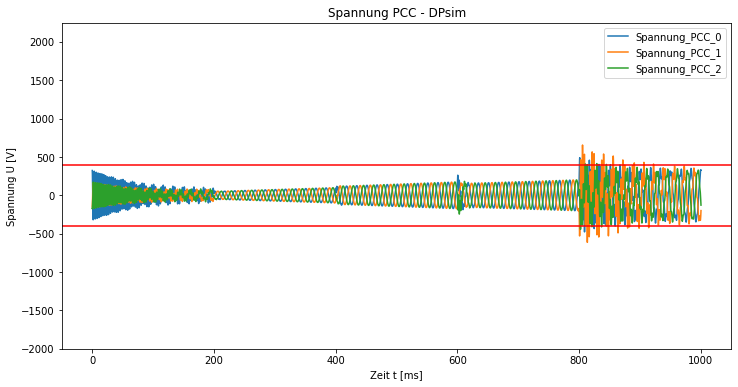

In [4]:
plt.figure(figsize=(12,6))
plt.title('Spannung PCC - DPsim')
plt.xlabel('Zeit t [ms]')
plt.ylabel('Spannung U [V]')
for ts_name, ts_obj  in ts_dpsim.items():
    if ts_name in ['Spannung_PCC_0', 'Spannung_PCC_1', 'Spannung_PCC_2']:
        plt.plot(1000*ts_obj.time, ts_obj.values, label=ts_name)
plt.axhline(y =400, color = 'r', linestyle = '-')
plt.axhline(y =-400, color = 'r', linestyle = '-')
plt.ylim(-2000,2250)
plt.legend()
plt.show()

NameError: name 'ts_dpsim_v' is not defined

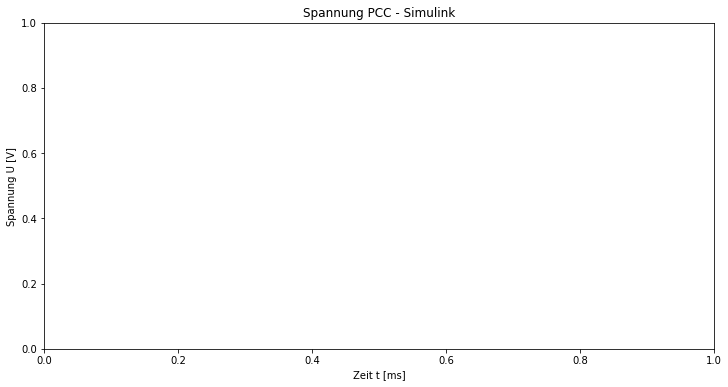

In [5]:
plt.figure(figsize=(12,6))
plt.title('Spannung PCC - Simulink')
plt.xlabel('Zeit t [ms]')
plt.ylabel('Spannung U [V]')
for ts_name, ts_obj  in ts_dpsim_v.items():
    if ts_name in ['Spannung_PCC_0', 'Spannung_PCC_1', 'Spannung_PCC_2']:
        plt.plot(1000*ts_obj.time, ts_obj.values, label=ts_name)
plt.axhline(y =400, color = 'r', linestyle = '-')
plt.axhline(y =-400, color = 'r', linestyle = '-')
plt.ylim(-2000,2250)
plt.legend()
plt.show()

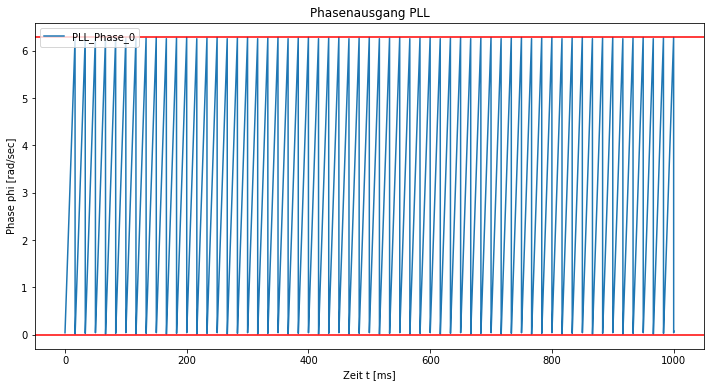

In [6]:
plt.figure(figsize=(12,6))
plt.title('Phasenausgang PLL')
plt.xlabel('Zeit t [ms]')
plt.ylabel('Phase phi [rad/sec]')
for ts_name, ts_obj  in ts_dpsim.items():
    if ts_name in ['PLL_Phase_0']:
        plt.plot(1000*ts_obj.time, (ts_obj.values)%(6.28319), label=ts_name)
plt.axhline(y =0, color = 'r', linestyle = '-')
plt.axhline(y =6.28319, color = 'r', linestyle = '-')
plt.legend()
plt.show()

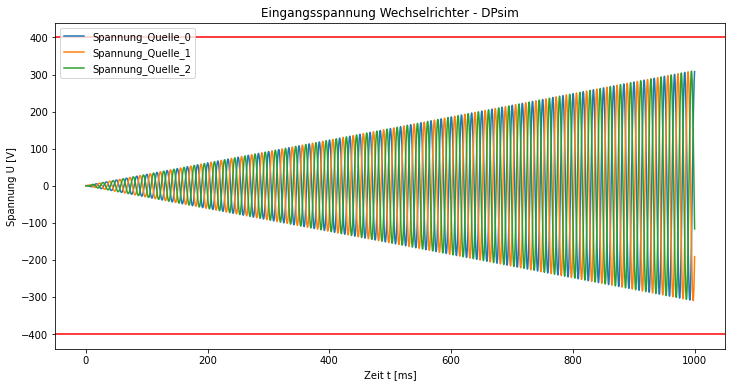

In [7]:
plt.figure(figsize=(12,6))
plt.title('Eingangsspannung Wechselrichter - DPsim')
plt.xlabel('Zeit t [ms]')
plt.ylabel('Spannung U [V]')
for ts_name, ts_obj  in ts_dpsim.items():
    if ts_name in ['Spannung_Quelle_0','Spannung_Quelle_1','Spannung_Quelle_2']:
        plt.plot(1000*ts_obj.time, ts_obj.values, label=ts_name)
plt.axhline(y =400, color = 'r', linestyle = '-')
plt.axhline(y =-400, color = 'r', linestyle = '-')
plt.legend()
plt.show()

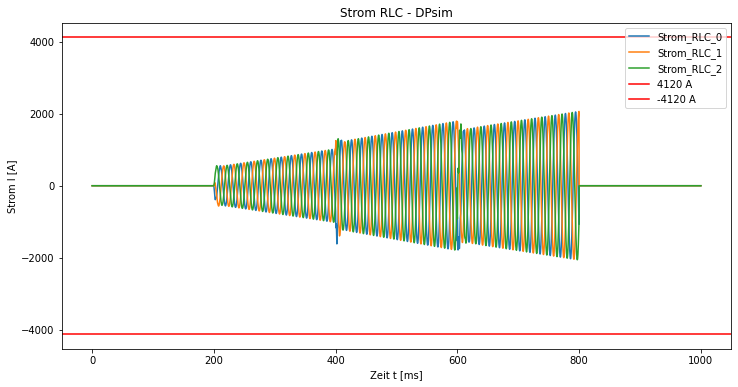

In [8]:
plt.figure(figsize=(12,6))
plt.title('Strom RLC - DPsim')
plt.xlabel('Zeit t [ms]')
plt.ylabel('Strom I [A]')
for ts_name, ts_obj  in ts_dpsim.items():
    if ts_name in ['Strom_RLC_0','Strom_RLC_1','Strom_RLC_2']:
        plt.plot(1000*ts_obj.time, ts_obj.values, label=ts_name)
plt.axhline(y =4120, color = 'r', linestyle = '-',label='4120 A')
plt.axhline(y =-4120, color = 'r', linestyle = '-',label='-4120 A')
plt.legend()
plt.show()

NameError: name 'ts_dpsim_simulink' is not defined

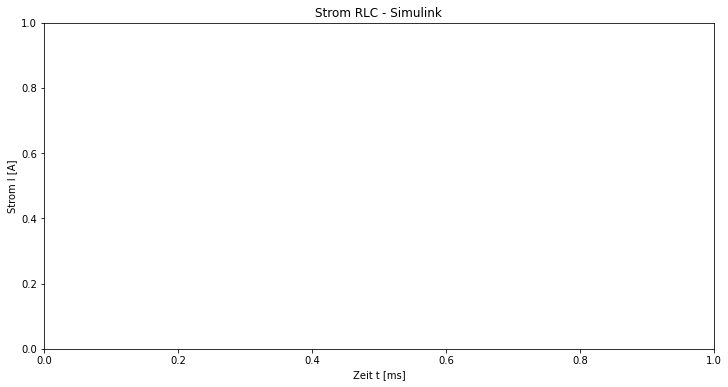

In [9]:
plt.figure(figsize=(12,6))
plt.title('Strom RLC - Simulink')
plt.xlabel('Zeit t [ms]')
plt.ylabel('Strom I [A]')
for ts_name, ts_obj  in ts_dpsim_simulink.items():
    if ts_name in ['Current_RLC_0','Current_RLC_1','Current_RLC_2']:
        plt.plot(1000*ts_obj.time, ts_obj.values, label=ts_name)
plt.axhline(y =4120, color = 'r', linestyle = '-',label='4120 A')
plt.axhline(y =-4120, color = 'r', linestyle = '-',label='-4120 A')
plt.legend()
plt.show()

In [ ]:
plt.figure(figsize=(12,6))
plt.title('Leistung PCC - DPsim')
plt.xlabel('Zeit t (ms)')
plt.ylabel('Wirkleistung P [W], Blindleistung Q [VA]')
for ts_name, ts_obj  in ts_dpsim.items():
    if ts_name in ['P_elec','Q_elec']:
        plt.plot(1000*ts_obj.time, ts_obj.values, label=ts_name)
plt.axhline(y =2465000, color = 'r', linestyle = '-', label='2.465 MW')
plt.ylim(-5e6, 6e6)
plt.legend()
plt.show()


In [ ]:
plt.figure(figsize=(12,6))
plt.title('Leistung PCC - Simulink')
plt.xlabel('Zeit t (ms)')
plt.ylabel('Wirkleistung P [W], Blindleistung Q [VA]')
for ts_name, ts_obj  in ts_dpsim_simulink.items():
    if ts_name in ['Blindleistung_PCC','Wirkleistung_PCC']:
        plt.plot(1000*ts_obj.time, ts_obj.values, label=ts_name)
plt.axhline(y =2465000, color = 'r', linestyle = '-', label='2.465 MW')
plt.ylim(-5e6, 6e6)
plt.legend()
plt.show()